# WeRateDogs Twitter account @dog_rates data wrangling project

### #TwitterAPI, #tweepy

## Table of Contents
- [Introduction](#Introduction)
- [Gathering data](#Gathering_data)
- [Assessing data](#Assessing_data)
- [Cleaning](#Cleaning)
- [Analysis_and_Visualization](#Analysis_and_Visualization)
- [Reporting](#Reporting)


### Introduction 

The aim of this project is to practice web scraping and data cleaning or wrangling for analysis. In this project, I gathered data by using the twitter archive for weratedogs twitter account, twitter's API - tweepy to gather the retweet adn favourite counts for each tweet in the archive, as well as an image prediction file. <br>
The gathered data is cleaned in various steps which are clearly highlighted in this notebook, and also summarized in wrangle_report.pdf.
Exploratory analysis is provided in the last part of this notebook, and also summarized in exploratory_report.pdf.


In [1]:
#Required libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering_data

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Download file image_predictions using the requests library from URL [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response #response 200- so it works

<Response [200]>

In [5]:
#download and save as image_predictions.tsv 
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
#check to see if it has been saved to folder
os.listdir()

['.ipynb_checkpoints',
 'act_report.docx',
 'act_report.pdf',
 'fig1.png',
 'fig2.png',
 'image_predictions.tsv',
 'requirements.txt',
 'tweet_json.txt',
 'twitter-archive-enhanced-2.csv',
 'twitter_archive_master.csv',
 'twitter_archive_master.zip',
 'twitter_retweets_favourite_counts.csv',
 'Twitter_token.txt',
 'wrangle_act - Copy.ipynb',
 'wrangle_act.ipynb',
 'wrangle_report.docx',
 'wrangle_report.pdf']

##### Use Twitter's API to get the retweet count and favourite count using tweet IDs and store in file called 
`tweet_json.txt`

In [139]:
#create list of tweet IDs
tweet_ids= list(twitter_archive.tweet_id)

In [140]:
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set wait_on_rate_limit and wait_on_rate_limit_notify to True to be notified of the Twitter'S API rate limits
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify = True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [141]:
#loop through tweet_ids list to get the json for all tweet IDs
no_status_ids=[]
start = time.time() # start timer
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            #get_status method returns an object in json format.
            tweet = api.get_status(tweet_id,  tweet_mode="extended") 
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            no_status_ids.append(tweet_id)
            continue
print('Done')

end = time.time() # end timer
print(end - start)

#print(tweet.text)
#print(tweet.full_text)

Rate limit reached. Sleeping for: 644
Rate limit reached. Sleeping for: 640


Done
1969.2348136901855


In [142]:
no_status_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [7]:
#extract the tweet ID, retweet_count, favorite_count from each line of the json file into dict
df_list=[]
with open('tweet_json.txt', 'r') as f:
    for line in f: 
        status= json.loads(line) 
        tweet_id = status['id']
        retweet_count=status['retweet_count']
        favorite_count= status['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                   'retweet_count': retweet_count,
                   'favorite_count': favorite_count})

In [8]:
#form dataframe from the created dict above
twitter_other_info= pd.DataFrame(df_list, columns= ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
twitter_other_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [10]:
twitter_other_info.to_csv('twitter_retweets_favourite_counts.csv', index= False)

## Assessing_data

In [11]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
sum(twitter_archive.duplicated())

0

In [15]:
twitter_archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [16]:
twitter_archive[twitter_archive['expanded_urls'] == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
twitter_archive.expanded_urls.sample(20)

2296    https://twitter.com/dog_rates/status/667090893...
190     https://twitter.com/perfy/status/8558573181681...
931     https://twitter.com/dog_rates/status/754120377...
2340    https://twitter.com/dog_rates/status/666099513...
728     https://twitter.com/dog_rates/status/707610948...
2041    https://twitter.com/dog_rates/status/671542985...
849     https://twitter.com/dog_rates/status/766008592...
343     https://twitter.com/dog_rates/status/769940425...
991     https://twitter.com/dog_rates/status/748699167...
824     https://twitter.com/dog_rates/status/769940425...
885     https://weratedogs.com/pages/about-us,https://...
638     https://twitter.com/dog_rates/status/793271401...
1281    https://twitter.com/dog_rates/status/708810915...
1310    https://twitter.com/dog_rates/status/707038192...
454     https://twitter.com/dog_rates/status/818536468...
934     https://twitter.com/dog_rates/status/753420520...
1350    https://twitter.com/dog_rates/status/704113298...
1583    https:

In [18]:
twitter_archive[twitter_archive['text'].str.contains('&', na= False)]['text']

113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
262     Meet Indie. She's not a fan of baths but she's...
273     RT @dog_rates: This is Pipsy. He is a fluffbal...
274     @0_kelvin_0 &gt;10/10 is reserved for puppos s...
320     Meet Chester (bottom) &amp; Harold (top). They...
387     I was going to do 007/10, but the joke wasn't ...
461     Say hello to Eugene &amp; Patti Melt. No matte...
485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
898     This is Lilli Bee &amp; Honey Bear. Unfortunat...
976     Meet Jax &amp; Jil. Jil is yelling the pledge ...
1104    Meet Buckley. His family &amp; some neighbors ...
1179    Meet Sid &amp; Murphy. Murphy floats alongside...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1274    From l

In [19]:
twitter_image_predictions= pd.read_csv('image_predictions.tsv', sep= '\t')
twitter_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
twitter_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
twitter_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
sum(twitter_image_predictions.duplicated())

0

In [23]:
twitter_other_info #contains retweet_count and favourite_count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7670,36030
1,892177421306343426,5671,31085
2,891815181378084864,3759,23393
3,891689557279858688,7844,39310
4,891327558926688256,8443,37538
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,131,271
2328,666033412701032449,41,112
2329,666029285002620928,42,121


In [24]:
twitter_other_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [25]:
#twitter_other_info.sample(20)

### Cleaning Tasks

**Quality issues**
    - twitter_archive dataframe:
        - dog_stage (doggo, floofer, pupper and puppo columns) not correctly extracted from text  column
        - dog_name not correctly extracted from text column 
        - name column contains None as the NaN values, 'very' and 'a' are also a common names
        - source column does not contain url in right format
        - doggo, floofer, pupper and puppo columns not of category type
        - rating_denominator is not 10 for all dogs
        - extra characters in text column '&amp;', '&gt;'
        - maximum of rating_numerator seems unusually high
        - decimal ratings do not show as decimal in rating_numerator
        - erroneoud data types (timestamp, retweeted_status_timestamp, dog_stage)
      
    - twitter_image_predictions dataframe:
        - p2 begins with lowercase letter while p1 and p3 begins with uppercase letters
        
    - twitter_other_info dataframe:
        - does not contain all tweets from twitter_archive dataframe
**Tidiness issues**
     - twitter_archive dataframe:
        - doggo, floofer, pupper and puppo columns are all different columns
     - twitter_other_info and twitter_image_predictions_clean are separte dataframes
     
        
    

## Cleaning

In [100]:
twitter_archive_clean= twitter_archive.copy()
twitter_image_predictions_clean= twitter_image_predictions.copy()
twitter_other_info_clean= twitter_other_info.copy()

###### Define

twitter_other_info_clean should be merged into twitter_archive_clean dataframe

###### Code

In [101]:
twitter_archive_clean=twitter_archive_clean.merge(twitter_other_info_clean, on = 'tweet_id', how= 'outer')

###### Test

In [102]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

###### Define

Merge in image prediction dataframe to twitter_archive_clean

###### Code

In [103]:
twitter_archive_clean=twitter_archive_clean.merge(twitter_image_predictions_clean, on = 'tweet_id', how= 'outer')

###### Test

In [104]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

###### Define

- dog_stage should combine doggo, floofer, pupper and puppo columns
- doggo, floofer, pupper and puppo columns can be deleted

###### Code

In [105]:
#replace None to empty
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [106]:
#create dog_stage column which combines all 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper']+twitter_archive_clean['puppo']

In [107]:
#separate columns with a comma and replace empties with NaN
twitter_archive_clean['dog_stage'].replace('doggopupper', 'doggo,pupper', inplace=True)
twitter_archive_clean['dog_stage'].replace('doggofloofer', 'doggo,floofer', inplace=True)
twitter_archive_clean['dog_stage'].replace('doggopuppo', 'doggo,puppo', inplace=True)
twitter_archive_clean['dog_stage'].replace('', np.nan, inplace=True)

In [108]:
#delete doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

###### Test

In [109]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [110]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

###### Define

- 'None' in name column contains should be replaced with NaN
- Replace 'very' name with NaN
- Replace 'a' name with NaN
- Replace '0' name with NaN

###### Code

In [111]:
twitter_archive_clean.name.replace('None', np.nan, inplace = True)
twitter_archive_clean.name.replace('very', np.nan, inplace = True)
twitter_archive_clean.name.replace('a', np.nan, inplace = True)
twitter_archive_clean.name.replace('10', np.nan, inplace = True)

###### Test

In [112]:
twitter_archive_clean[twitter_archive_clean['name'] == 'None']
twitter_archive_clean[twitter_archive_clean['name'] == 'very']
twitter_archive_clean[twitter_archive_clean['name'] == 'a']
twitter_archive_clean[twitter_archive_clean['name'] == '10']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


###### Define

change source to either Twitter for iPhone, Vine, Twitter Web or TweetDeck, change to category

###### Code

In [113]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [114]:
twitter_archive_clean.source= twitter_archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean.source= twitter_archive_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean.source= twitter_archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean.source= twitter_archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

###### Test

In [115]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

###### Define

change rating_denominator to be 10 for all observations because this is the standard of the twitter account

###### Code

In [116]:
twitter_archive_clean['rating_denominator'] = 10

###### Test

In [117]:
twitter_archive_clean.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

###### Define

change dog stage to category data type

###### Code

In [118]:
twitter_archive_clean.dog_stage= twitter_archive_clean.dog_stage.astype('category')

###### Test

In [119]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        1551 non-null   object  
 13  retweet_count     

###### Define

Replace \*&amp\* with '&' and replace \*&gt\* with '>'

###### Code

In [120]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&gt;', '>')

###### Test

In [121]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains('&', na= False)]['text']

262     Meet Indie. She's not a fan of baths but she's...
273     RT @dog_rates: This is Pipsy. He is a fluffbal...
320     Meet Chester (bottom) & Harold (top). They are...
387     I was going to do 007/10, but the joke wasn't ...
461     Say hello to Eugene & Patti Melt. No matter ho...
485     RT @dog_rates: Meet Beau & Wilbur. Wilbur stol...
516     Meet Sam. She smiles 24/7 & secretly aspires t...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie & Lila. Maggie is the doggo, Lila ...
898     This is Lilli Bee & Honey Bear. Unfortunately,...
976     Meet Jax & Jil. Jil is yelling the pledge of a...
1104    Meet Buckley. His family & some neighbors came...
1179    Meet Sid & Murphy. Murphy floats alongside Sid...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1274    From left to right:\nCletus, Jerome, Alejandro...
1366    Meet Rambo & Kiwi. Rambo's the pup with the sh...
1421    Meet B

###### Define

check the unusually high rating numerators and change them if need be

###### Code

In [122]:
twitter_archive_clean.query('rating_numerator>20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 & secretly aspires t...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN


In [123]:
#to see tweet text properly
list(twitter_archive_clean.query('rating_numerator>20').text)

['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
 '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
 '@markhoppus 182/10',
 "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to 

In [124]:
#change data type for rating_numerator and rating denominator to float
twitter_archive_clean.rating_numerator= twitter_archive_clean.rating_numerator.astype('float')
twitter_archive_clean.rating_denominator= twitter_archive_clean.rating_denominator.astype('float')

In [125]:
#change the rating_numerators individually
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 832215909146226688) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#For the others, the tweet text actually gives them such large rating_numerator

###### Test

In [126]:
twitter_archive_clean.query('rating_numerator>20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 & secretly aspires t...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,...,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN


###### Define

From above, it seems that ratings with decimals were not correctly extracted from the text

###### Code

In [127]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)", na= False)]

C:\Users\Oyinkan\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,NaN


In [128]:
#to see tweet text properly
list(twitter_archive_clean.query('tweet_id == 883482846933004288 or tweet_id == 681340665377193984').text)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"]

In [129]:
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 681340665377193984) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 9.5

###### Test

In [130]:
twitter_archive_clean.query('tweet_id == 883482846933004288 or tweet_id == 681340665377193984')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Define

- change timestamp column to date data type
- change retweeted_status_timestamp column to date data type

###### Code

In [131]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

###### Test

In [132]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

###### Define

Write cleaned dataframe to twitter_archive_master.csv

###### Code

In [133]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index= False)

###### Test

In [134]:
os.listdir()

['.ipynb_checkpoints',
 'act_report.docx',
 'act_report.pdf',
 'fig1.png',
 'fig2.png',
 'image_predictions.tsv',
 'requirements.txt',
 'tweet_json.txt',
 'twitter-archive-enhanced-2.csv',
 'twitter_archive_master.csv',
 'twitter_archive_master.zip',
 'twitter_retweets_favourite_counts.csv',
 'Twitter_token.txt',
 'wrangle_act - Copy.ipynb',
 'wrangle_act.ipynb',
 'wrangle_report.docx',
 'wrangle_report.pdf']

## Analysis_and_Visualization

In [135]:
# For analysis, create a copy of the cleaned twitter archive data
df = twitter_archive_clean.copy()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [137]:
#Most used twitter source
df.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [138]:
df.query('source == "Twitter for iPhone"').source.count()/df.source.count()

0.9426994906621392

Twitter for iphone is the most common source, with about 94% of all tweets in this data set

In [148]:
df.retweet_count.max()

77411.0

The highest number of retweets for any tweet in the dataset is over 77 thousand

In [149]:
df.favorite_count.max()

155445.0

The most liked tweet in the data set liked was over 155 thousand times

In [139]:
#Average retweet counts
print('The mean retweet count is', round(df.retweet_count.mean()))
print('The mean retweet count is', round(df.favorite_count.mean()))

The mean retweet count is 2691
The mean retweet count is 7525


In [154]:
#Dog stages
df['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

The most common dog stage is the pupper, followed by the doggo.

In [146]:
#Mean retweet count, by dog stage
round(df.groupby('dog_stage').retweet_count.mean())

dog_stage
doggo             6271.0
doggo,floofer     3042.0
doggo,pupper      4658.0
doggo,puppo      17281.0
floofer           3628.0
pupper            2422.0
puppo             5472.0
Name: retweet_count, dtype: float64

Tweets with dogs in the doggo,puppo stages had the highest retweet counts on average

In [147]:
#Mean favorite count, by dog stage
round(df.groupby('dog_stage').favorite_count.mean())

dog_stage
doggo            15510.0
doggo,floofer    15768.0
doggo,pupper      9957.0
doggo,puppo      44264.0
floofer          10048.0
pupper            6087.0
puppo            16572.0
Name: favorite_count, dtype: float64

Tweets with dogs in the doggo,puppo stages had the highest favourite counts on average

##### Number of tweets by year and month

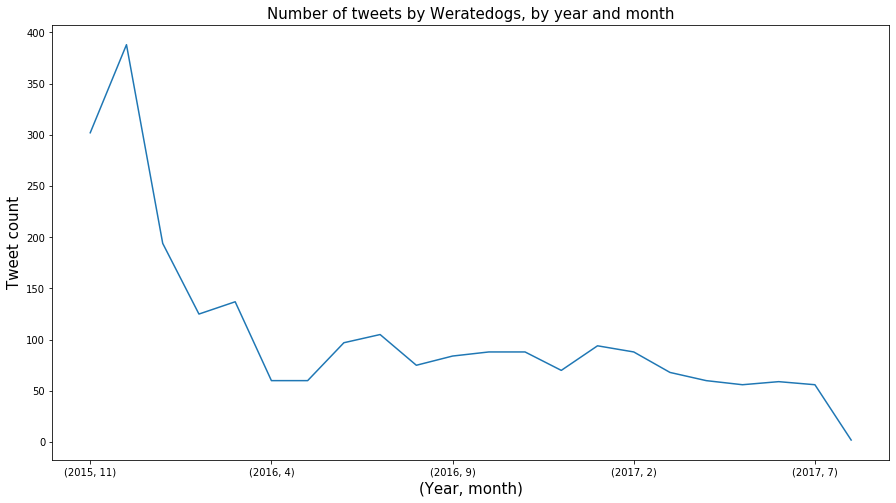

In [150]:
data= df.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).tweet_id.count().plot(kind= 'line', figsize=(15,8))
data.set_xlabel('(Year, month)', fontsize=15)
data.set_ylabel('Tweet count', fontsize=15)
data.set_title('Number of tweets by Weratedogs, by year and month', fontsize=15)
plt.savefig('fig1.png');

Weratedogs had the most tweets in December 2015.

##### Retweet and favorite counts by year and month


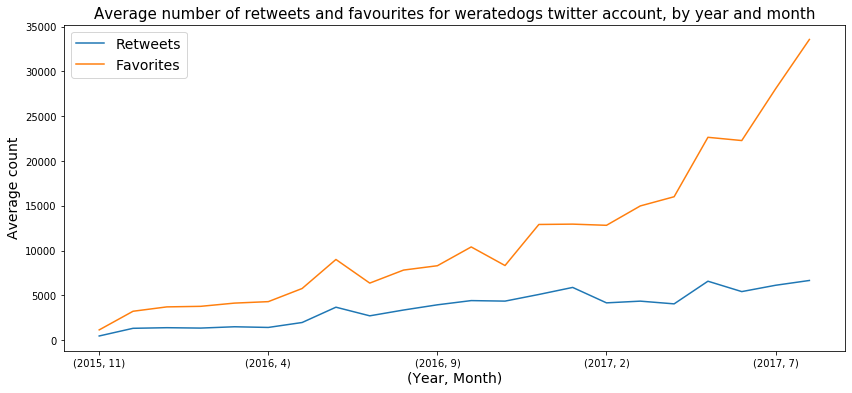

In [151]:
ax= df.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).retweet_count.mean().plot(kind= 'line', figsize =(14,6))
df.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).favorite_count.mean().plot(kind= 'line', figsize =(14,6))
plt.ylabel('Average count', fontsize= 14)
plt.legend(('Retweets', 'Favorites'), fontsize = 14)
plt.title('Average number of retweets and favourites for weratedogs twitter account, by year and month', fontsize = 15)
ax.set_xlabel('(Year, Month)', fontsize= 14)
plt.savefig('fig2.png');

The retweet and favourite counts both increased over time.

## Reporting

There are 2 reports provided with this file:
- wrangle_act.pdf, which reports the process of gathering and cleaning my data
- act_report.pdf, which reports the analysis and visualization done with the gathered and wrangled twitter data. 